# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [368]:
#Type your code here

#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [369]:
# Load data

# Load data dari google drive: "https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m"
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [370]:
# Tampilkan 5 baris pertama dengan function head.

# Menampilkan 5 baris pertama
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [371]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

# Menampilkan info dari tiap tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [372]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

# Menampilkan statistik ringkas untuk semua baris numerik
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

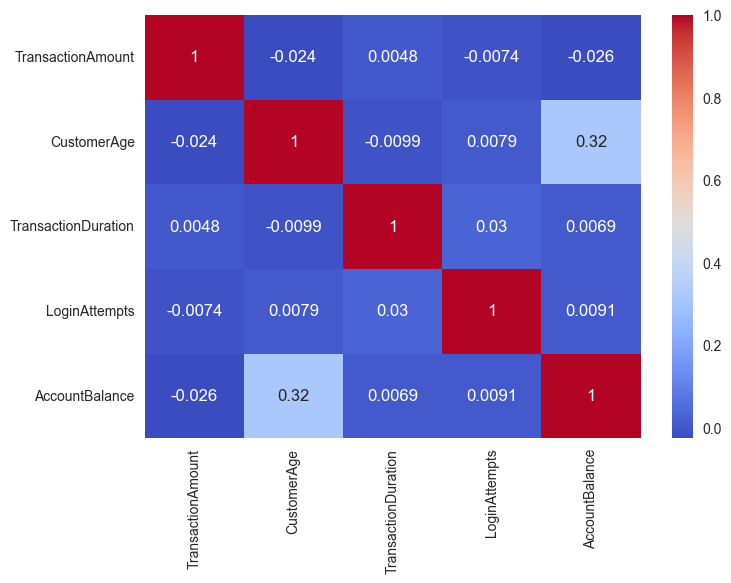

In [373]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

# Memisahkan kolom numerik dari data.
numeric_cols = df.select_dtypes(include=[np.number])

# Menampilkan corelasi antar kolom.
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

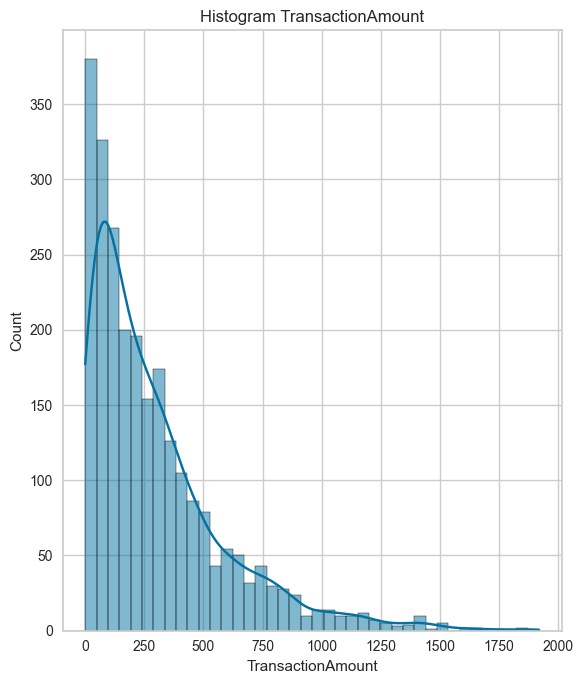

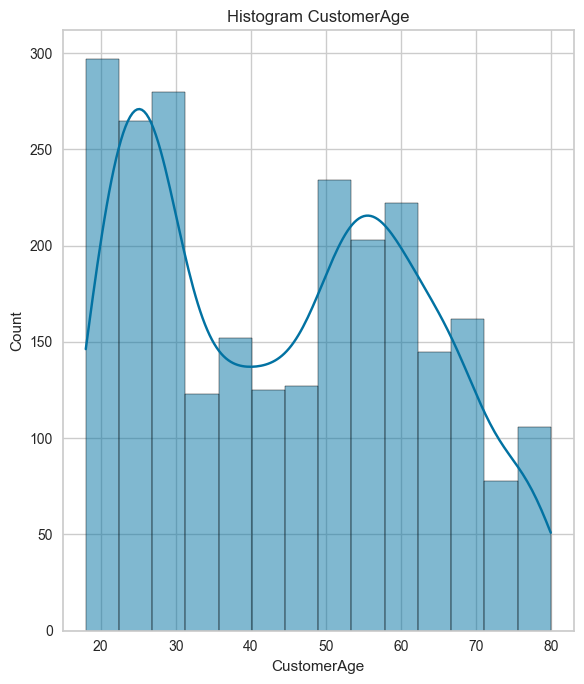

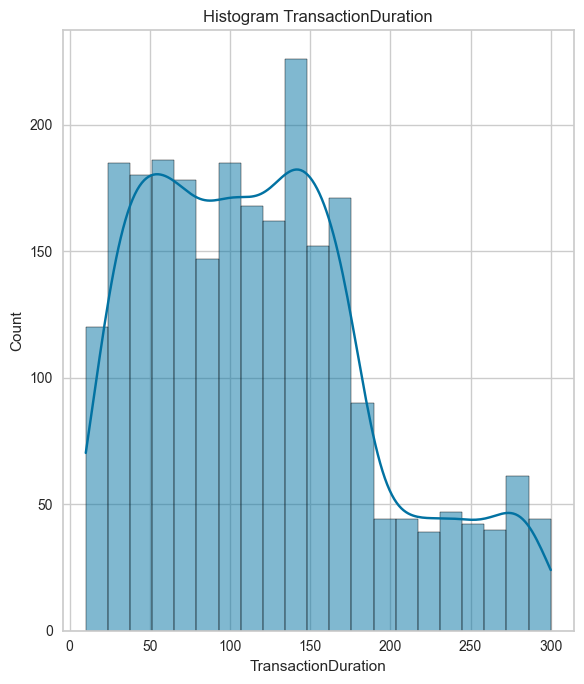

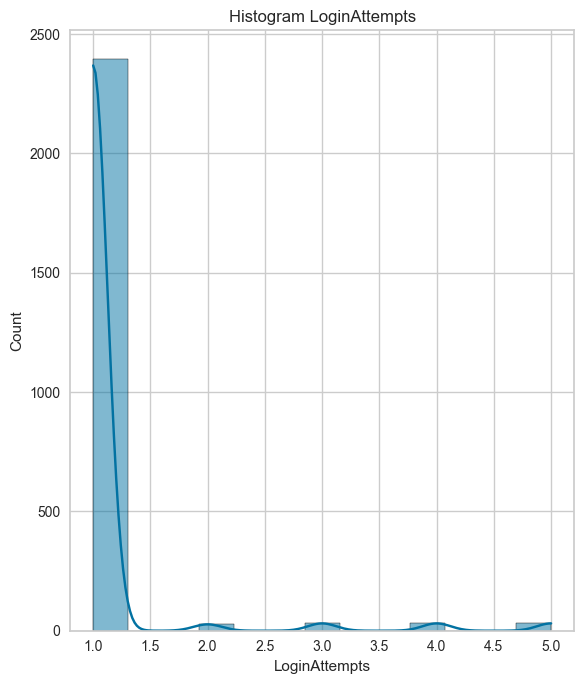

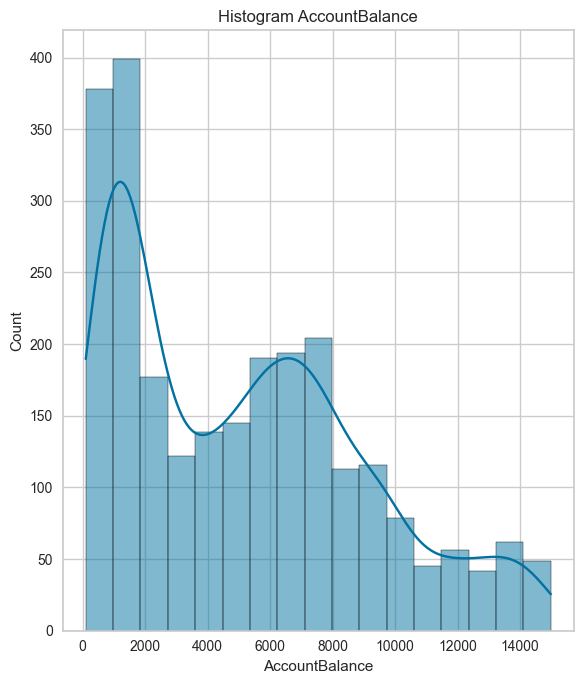

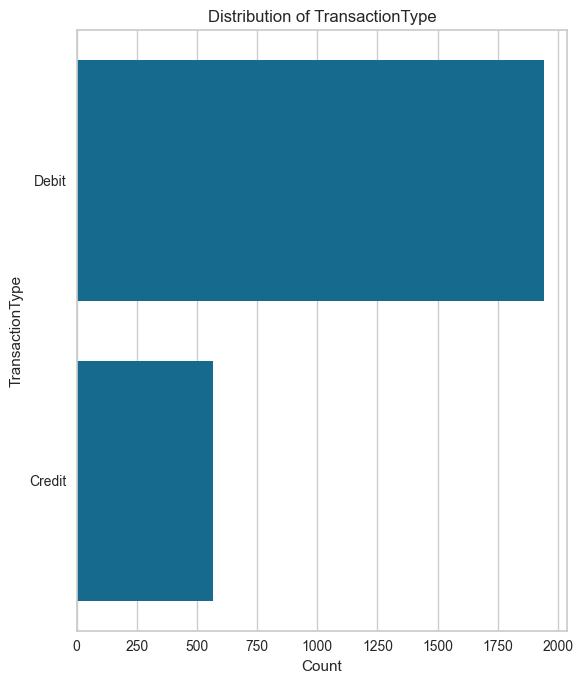

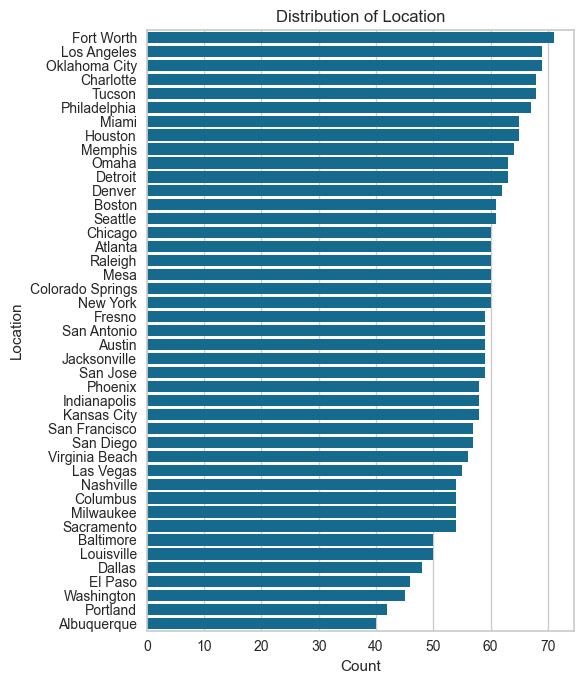

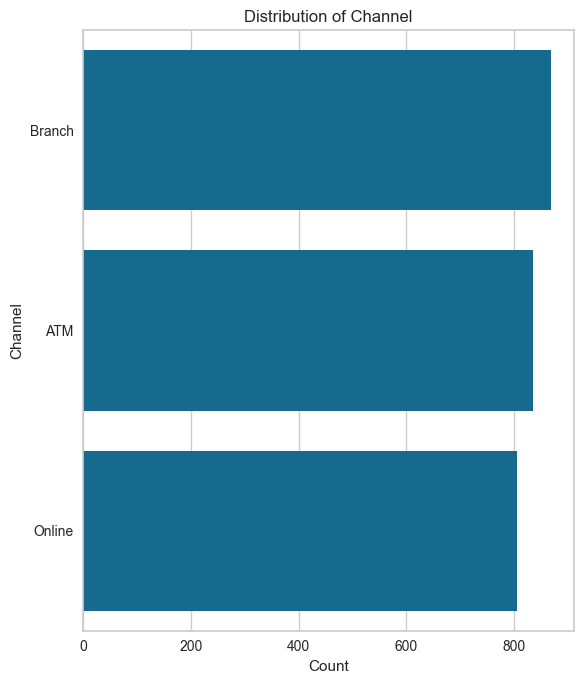

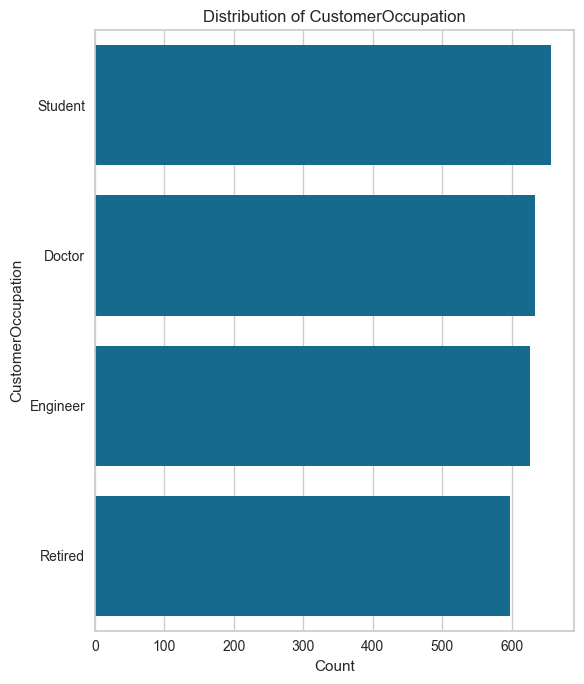

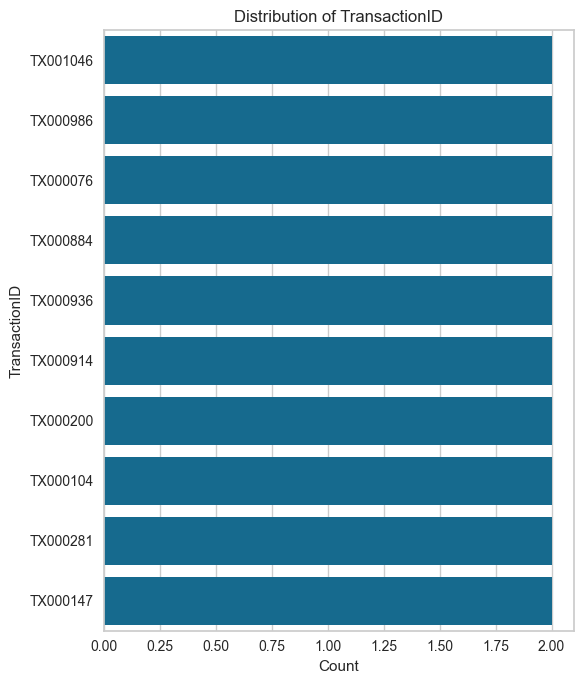

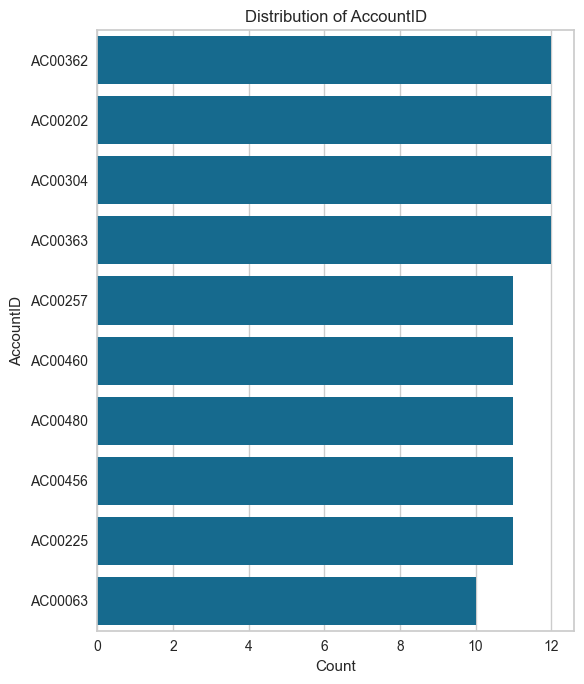

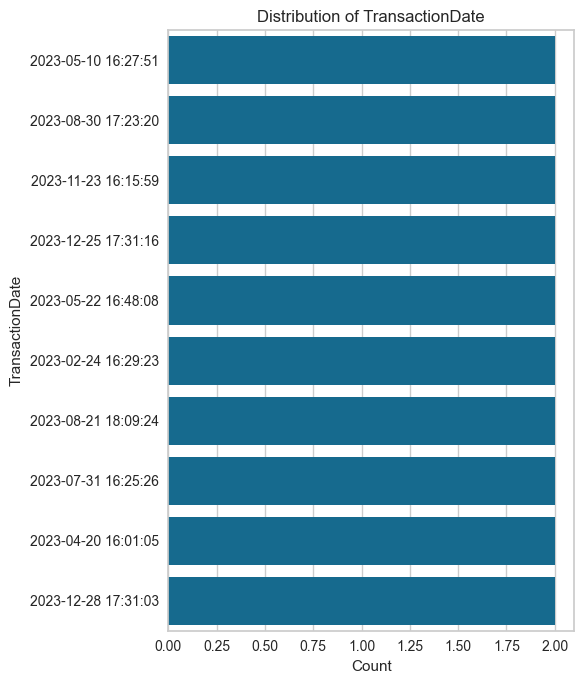

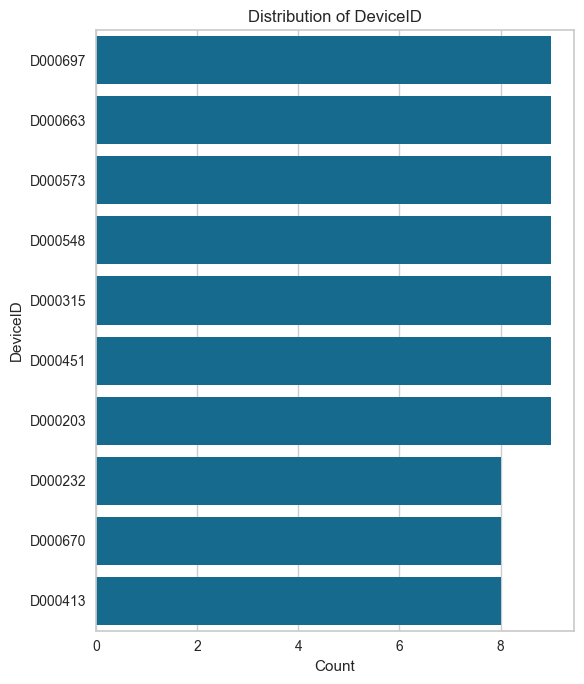

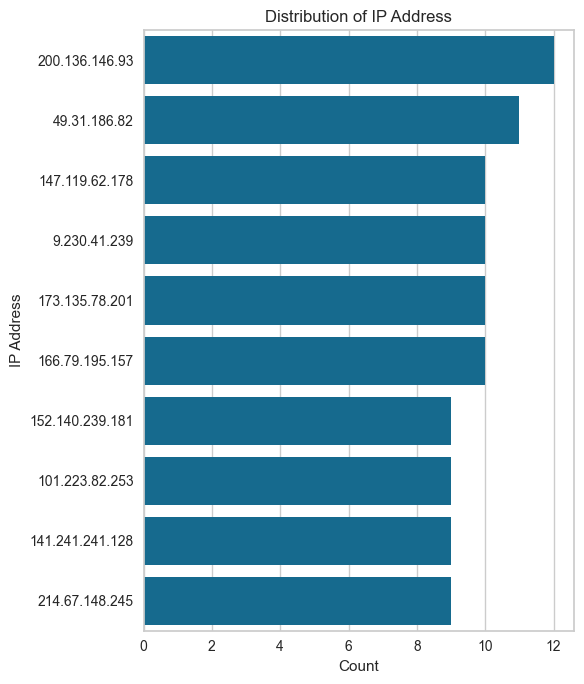

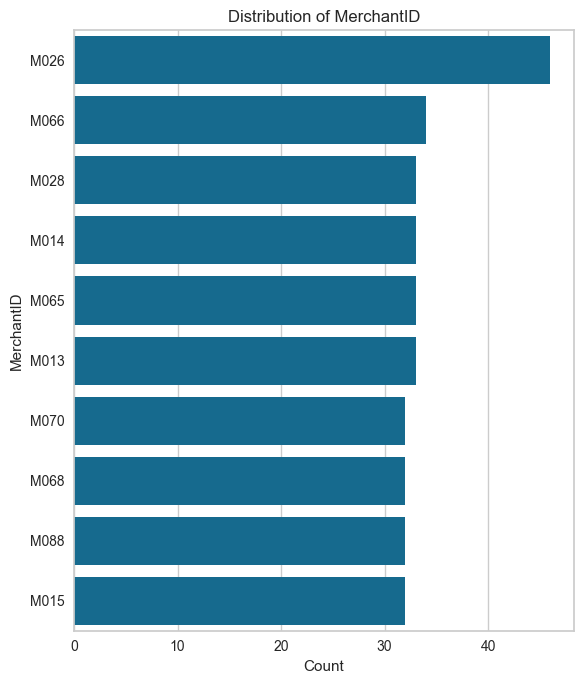

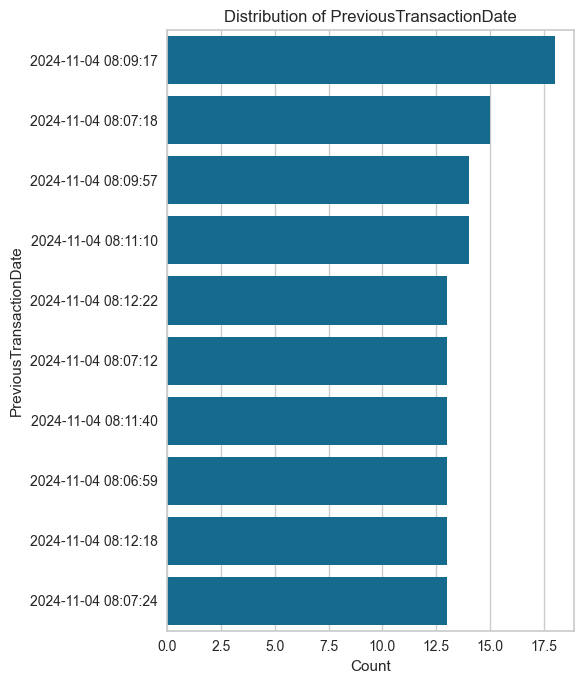

In [374]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

# Menampilkan Histogam untuk numeric kolom
for cols in numeric_cols:
    plt.figure(figsize=(6,7))
    sns.histplot(df[cols], kde=True)
    plt.title(f'Histogram {cols}')
    plt.xlabel(cols)
    plt.tight_layout()
    plt.show()

# Menampilkan Countplot untuk Categorical kolom.
# Memisah categorical colomn menjadi dua agar tidak overlap.
categorical_cols_1 = df[["TransactionType","Location","Channel","CustomerOccupation"]]
categorical_cols_2 = df[["TransactionID","AccountID","TransactionDate","DeviceID","IP Address","MerchantID","PreviousTransactionDate"]]

for col in categorical_cols_1:
    plt.figure(figsize=(6, 7))
    sns.countplot(y=col, data=df, order = df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

for col in categorical_cols_2:
    top_category = df[col].value_counts().head(10) # Mengambil 10 category tertinggi.
    plt.figure(figsize=(6, 7))
    sns.countplot(y=col, data=df, order = top_category.index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()



(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

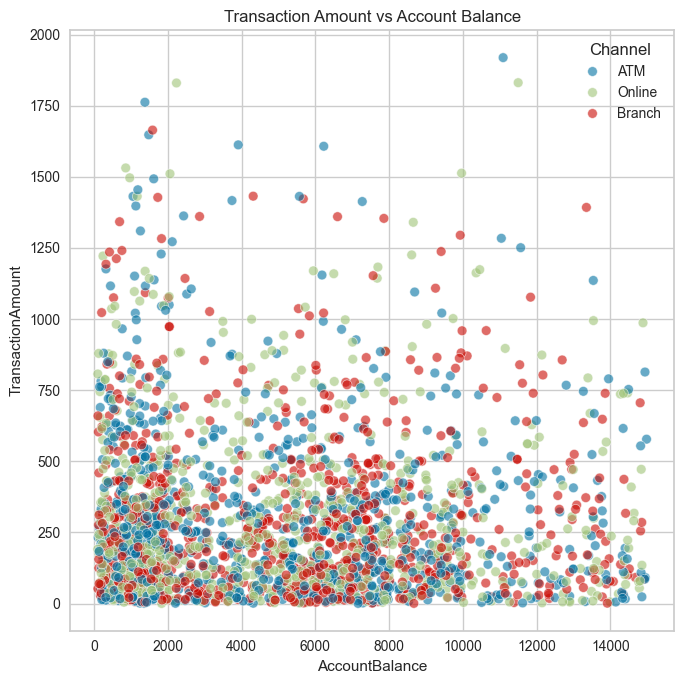

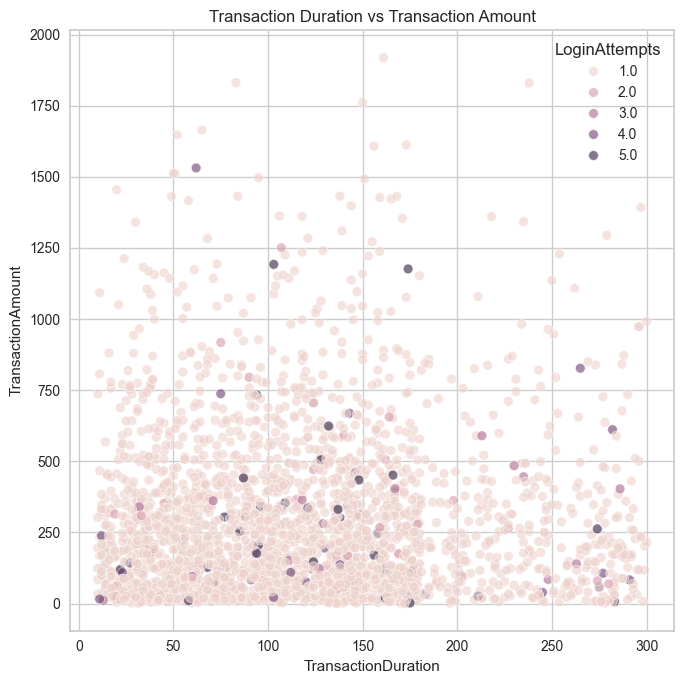

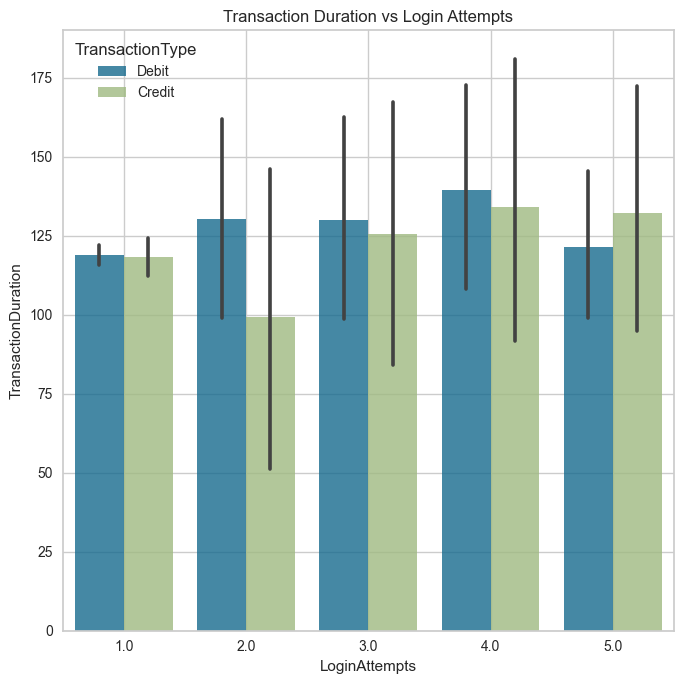

In [375]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(7,7))
sns.scatterplot(x='AccountBalance', y='TransactionAmount', hue=df['Channel'],data=df, alpha=0.6)
plt.title('Transaction Amount vs Account Balance')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,7))
sns.scatterplot(x='TransactionDuration', y='TransactionAmount', hue=df['LoginAttempts'],data=df, alpha=0.6)
plt.title('Transaction Duration vs Transaction Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,7))
sns.barplot(x='LoginAttempts', y='TransactionDuration', hue=df['TransactionType'],data=df, alpha=0.8)
plt.title('Transaction Duration vs Login Attempts')
plt.grid(True)
plt.tight_layout()
plt.show()



# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [376]:
# Mengecek dataset menggunakan duplicated().sum()
print(f"Jumlah data duplicated: {df.duplicated().sum()}")

Jumlah data duplicated: 21


In [377]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[numeric_cols.columns] = scaler.fit_transform(df[numeric_cols.columns])

df_scaled.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [378]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df_scaled.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address','MerchantID'], inplace=True)
df_scaled.head(5)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [379]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df_scaled.select_dtypes(exclude=np.number)

df_scaled[categorical_cols.columns] = df_scaled[categorical_cols.columns].apply(LabelEncoder().fit_transform)

df_scaled.head(5)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [380]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df_scaled.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [381]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
print(f"Jumlah dari data yang kosong sebelum imputasi: {df_scaled.isnull().sum().sum()}")

df_scaled = df_scaled.fillna(df.mean(numeric_only=True))

print(f"Jumlah dari data yang kosong sesudah imputasi: {df_scaled.isnull().sum().sum()}")

Jumlah dari data yang kosong sebelum imputasi: 118
Jumlah dari data yang kosong sesudah imputasi: 0


In [382]:
# Menghapus data duplikat menggunakan drop_duplicates().
print(f"Jumlah dari data Duplikat sebelum dihapus: {df_scaled.duplicated().sum()}")

df_scaled = df_scaled.drop_duplicates()

print(f"Jumlah dari data Duplikat sesudah dihapus: {df_scaled.duplicated().sum()}")

Jumlah dari data Duplikat sebelum dihapus: 22
Jumlah dari data Duplikat sesudah dihapus: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Total baris awal: 2515
Jumlah Outlier (TransactionAmount, factor=1.0): 223
Jumlah Outlier (AccountBalance, factor=1.0): 71
Jumlah Outlier (CustomerAge, factor=1.0): 17
Total baris setelah drop: 2204


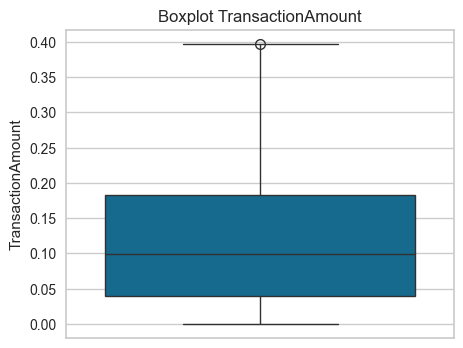

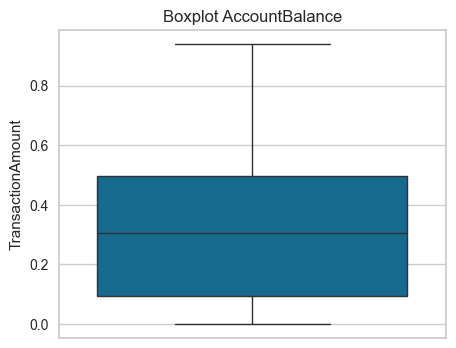

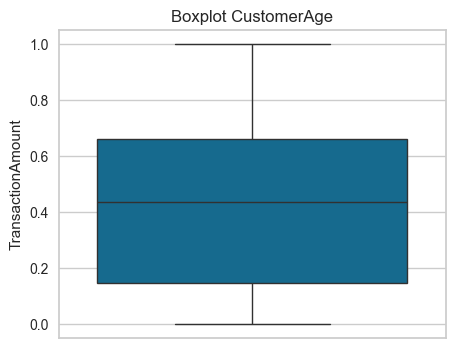

In [383]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
col = ["TransactionAmount", "AccountBalance","CustomerAge"]
factor = 1.0

numeric_cols = df_scaled.select_dtypes(include=[np.number]).columns
print(f"Total baris awal: {int(len(df_scaled))}")

for cols in col:
    
    Q1 = df_scaled[cols].quantile(0.25)
    Q3 = df_scaled[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    outliers = (df_scaled[cols] < lower_bound) | (df_scaled[cols] > upper_bound)
    num_outliers = int(outliers.sum())

    print(f"Jumlah Outlier ({cols}, factor={factor}): {num_outliers}")

    df_scaled_dropped = df_scaled[~outliers]
    df_scaled = df_scaled_dropped

print(f"Total baris setelah drop: {len(df_scaled)}")

for cols in col:
    plt.figure(figsize=(5,4))
    sns.boxplot(df_scaled[cols])
    plt.title(f'Boxplot {cols}')
    plt.ylabel('TransactionAmount')
    plt.show()


In [384]:
  # Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.Z
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

df_scaled["binning_age"] = pd.qcut(df_scaled['CustomerAge'], q=5,labels=False)
df_scaled["binning_account_balance"] = pd.qcut(df_scaled['AccountBalance'], q=4,labels=False)

df_scaled.head(5)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,binning_age,binning_account_balance
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,4,2
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,4,3
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0,3
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [385]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_scaled.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,binning_age,binning_account_balance
count,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000
mean,0.122205,1250.416062,0.791742,21.337114,1.004537,0.429688,1.560345,1.512083,0.038879,0.324422,181.688748,1.946461,1.500000
std,0.098627,730.313260,0.436327,12.392223,0.827345,0.288218,1.139991,11.569896,0.176416,0.247542,103.463556,1.434242,1.118288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.039320,617.750000,1.000000,11.000000,0.000000,0.145161,1.000000,0.182759,0.000000,0.092991,93.000000,1.000000,0.750000
50%,0.098648,1245.000000,1.000000,21.000000,1.000000,0.435484,2.000000,0.355172,0.000000,0.304535,183.000000,2.000000,1.500000
75%,0.182139,1886.250000,1.000000,32.000000,2.000000,0.661290,3.000000,0.531034,0.000000,0.497413,272.000000,3.000000,2.250000
max,0.396837,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,119.422939,1.121622,0.939502,360.000000,4.000000,3.000000


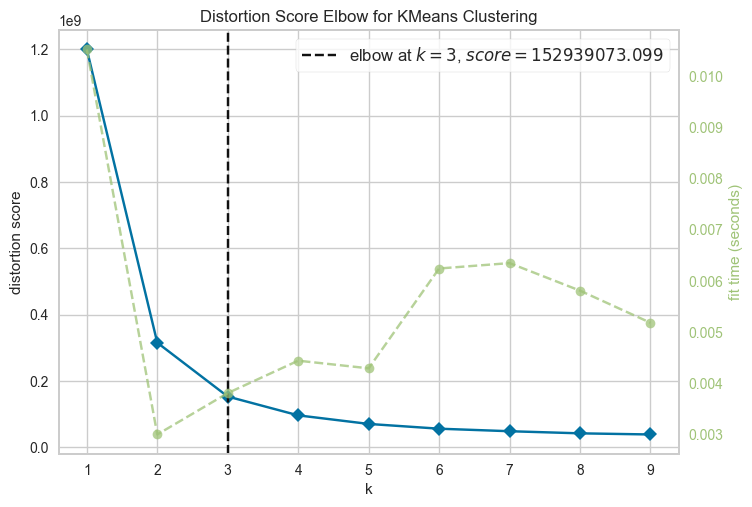

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [386]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_scaled)
visualizer.show()

In [387]:
model = KMeans(n_clusters=3, random_state=42) 
model.fit(df_scaled)

labels = model.labels_
k = 3

def analyze_cluster(df_scaled, labels, k):
    print("Karakteristik tiap label:")
    for cluster_id in range(k):
        idx = np.where(labels == cluster_id)[0]

        if idx.size == 0:
            print(f"\nCluster {cluster_id + 1}: (kosong)")
            continue
        
        cluster_data = df_scaled.iloc[idx]

        mean_transaction_amount = cluster_data.iloc[:, 0].mean()
        mean_account_balance = cluster_data.iloc[:, 1].mean()
        n = len(cluster_data)

        print(f"\nCluster {cluster_id} (n={n}):")
        print(f"  Rata-rata Transaction Amount: {mean_transaction_amount:.2f}")
        print(f"  Rata-rata Account Balance: {mean_account_balance:.2f}")

# panggil
analyze_cluster(df_scaled, labels, k)


Karakteristik tiap label:

Cluster 0 (n=731):
  Rata-rata Transaction Amount: 0.12
  Rata-rata Account Balance: 406.83

Cluster 1 (n=744):
  Rata-rata Transaction Amount: 0.12
  Rata-rata Account Balance: 2091.20

Cluster 2 (n=729):
  Rata-rata Transaction Amount: 0.12
  Rata-rata Account Balance: 1238.23


Jalankan cell code ini untuk menyimpan model kamu.

In [388]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [389]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(df_scaled, model.labels_)
print(score)

0.5427578113785458


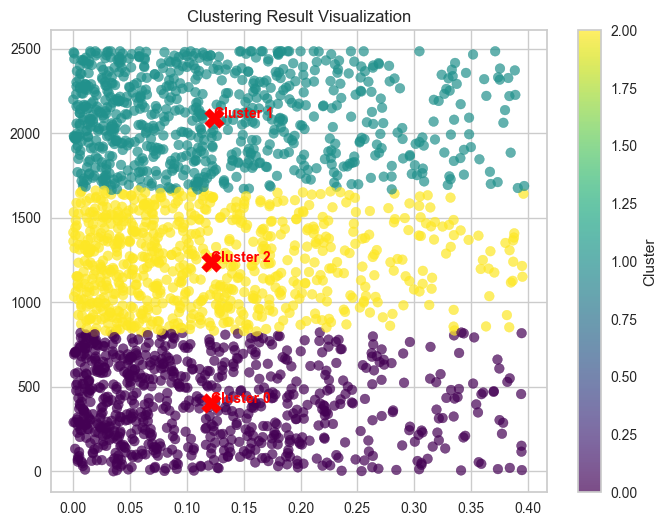

In [390]:

centroids = model.cluster_centers_

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df_scaled.iloc[:, 0], 
    df_scaled.iloc[:, 1],  
    c=labels,
    cmap='viridis',
    alpha=0.7,
    label='Data Points'
)
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='red', 
    marker='X', 
    s=200, 
    label='Centroids'
)

for i in range(len(centroids)):
    plt.text(
        centroids[i, 0], 
        centroids[i, 1], 
        f'Cluster {i}', 
        fontsize=10, 
        fontweight='bold', 
        color='red'
    )
    
plt.title('Clustering Result Visualization')
plt.colorbar(scatter, label='Cluster')
plt.show()


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [391]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
model_pca = KMeans(n_clusters=3, random_state=42)
model_pca.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

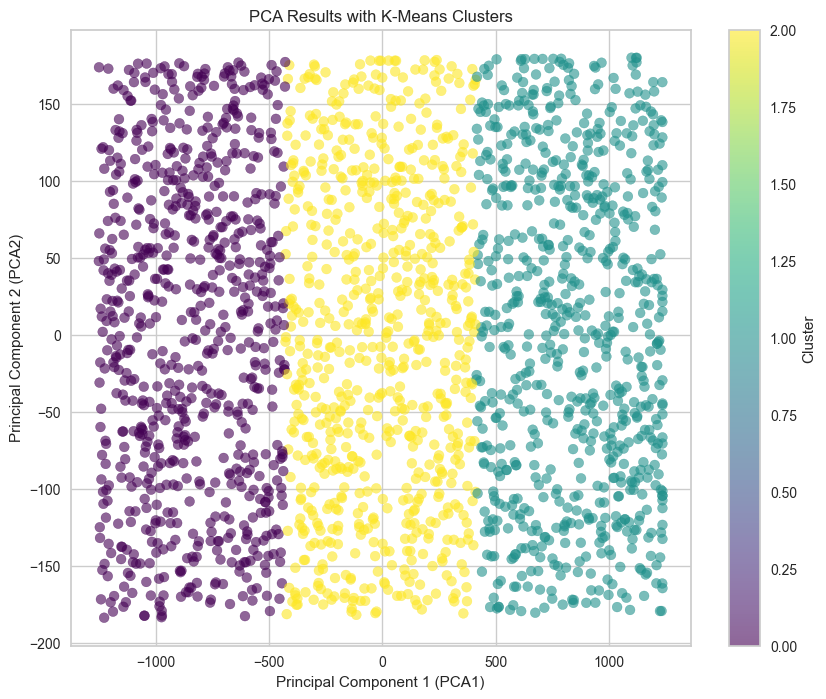

In [392]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=model.labels_, cmap='viridis', s=50, alpha=0.6)
plt.title('PCA Results with K-Means Clusters')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.colorbar(label='Cluster')
plt.show()

In [393]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(model_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah dengan Transaksi Besar dan Saldo Tinggi)**:
  - **Rata-rata (mean) Transaction Amount:** 0.953 (nilai transaksi tinggi)
  - **Rata-rata (mean) Account Balance:** 0.8 (saldo akun tinggi)
  - **Analisis:** Cluster ini mencakup nasabah dengan nilai transaksi tinggi dan saldo akun yang cukup tinggi. Nasabah dalam cluster ini cenderung memiliki kapasitas finansial yang tinggi dan mereka lebih cenderung untuk melakukan transaksi dengan nilai yang besar. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [394]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df_scaled['Cluster'] = labels

# Pilih hanya Kolom numerik dan Cluster
num_col = ['TransactionAmount','CustomerAge', 'CustomerOccupation', 'TransactionDuration','AccountBalance']
agregasi_data = df_scaled[num_col + ['Cluster']]
agg_result = agregasi_data.groupby("Cluster")[num_col].agg(["mean", "min", "max", "median", "std"])
pd.set_option('display.max_columns', None)
agg_result.head()

TransactionAmount                                         CustomerAge  \
                     mean       min       max    median       std        mean   
Cluster                                                                         
0                0.120966  0.000313  0.394783  0.092149  0.099917    0.413508   
1                0.124242  0.000000  0.396837  0.105407  0.099814    0.429609   
2                0.121368  0.000031  0.396211  0.097110  0.096180    0.445993   

                                      CustomerOccupation                 \
         min  max    median       std               mean min max median   
Cluster                                                                   
0        0.0  1.0  0.387097  0.285990           1.537620   0   4    2.0   
1        0.0  1.0  0.443548  0.288094           1.548387   0   4    2.0   
2        0.0  1.0  0.483871  0.290042           1.595336   0   4    2.0   

                  TransactionDuration                                        \
              std                mean  min         max    median        std   
Cluster                                                                       
0        1.154927            1.343318  0.0  119.422939  0.341379  10.751959   
1        1.134470            1.666125  0.0  119.422939  0.348276  12.287756   
2        1.131240            1.524098  0.0  119.422939  0.365517  11.619208   

        AccountBalance                                          
                  mean       min       max    median       std  
Cluster                                                         
0             0.324895  0.000377  0.935699  0.308693  0.251410  
1             0.332076  0.000000  0.939502  0.315159  0.248462  
2             0.316136  0.001125  0.926965  0.288283  0.242723

# Analisis Segmentasi Nasabah Bank

Analisis ini menggunakan metode *clustering* (pengelompokan) untuk membagi nasabah bank menjadi tiga segmen utama berdasarkan fitur-fitur keuangan mereka: **TransactionAmount (Jumlah Transaksi)**, **CustomerAge (Usia Nasabah)**, **CustomerOccupation (Pekerjaan Nasabah)**, **TransactionDuration (Durasi Transaksi)**, dan **AccountBalance (Saldo Akun)**.

Data yang digunakan dalam analisis ini telah **dinormalisasi/distandardisasi**, sehingga nilai rata-rata (*mean*) dan rentang (*min/max*) berada dalam skala 0 hingga 1 (atau sedikit lebih tinggi).

---

## Ringkasan Deskriptif Klaster

| Cluster | TransactionAmount (mean) | AccountBalance (mean) | TransactionDuration (mean) | CustomerAge (mean) | Jumlah Nasabah (n) |
| :---: | :---: | :---: | :---: | :---: | :---: |
| **0** | $0.120488$ | $0.320498$ | $1.153414$ | $0.713449$ | 737 |
| **1** | $0.123018$ | $0.330673$ | $1.133017$ | $0.800346$ | 752 |
| **2** | $0.121515$ | $0.317888$ | $1.102046$ | $0.688112$ | 732 |

---

## Karakteristik dan Interpretasi Setiap Klaster

### 1. Cluster 1: Nasabah Saldo Tinggi
* **Jumlah Nasabah (n):** 752 (Terbesar)
* **Karakteristik Utama:**
    * **Rata-rata Saldo Akun (Mean: $0.330673$):** Tertinggi di antara semua klaster.
    * **Rata-rata Usia (Mean: $0.800346$):** Tertinggi.
    * **Rata-rata Transaksi (Mean: $0.123018$):** Tertinggi, meskipun perbedaannya marginal.
* **Interpretasi:** Klaster ini merepresentasikan nasabah **bernilai tinggi (High-Value)** yang cenderung **lebih tua** dan memiliki **stabilitas finansial tertinggi**. Mereka menyimpan dana signifikan di bank, menjadikannya target utama untuk produk investasi atau layanan pengelolaan kekayaan (*wealth management*).

---

### 2. Cluster 0: Nasabah Saldo Menengah
* **Jumlah Nasabah (n):** 737
* **Karakteristik Utama:**
    * **Rata-rata Saldo Akun (Mean: $0.320498$):** Berada di posisi menengah, lebih tinggi dari Klaster 2.
    * **Rata-rata Usia (Mean: $0.713449$):** Menengah.
    * **Rata-rata Transaksi (Mean: $0.120488$):** Terendah.
* **Interpretasi:** Ini adalah segmen nasabah bank yang **paling standar/rata-rata**. Saldo mereka menunjukkan stabilitas finansial yang layak, namun aktivitas transaksinya masih pasif. Klaster ini berpotensi ditingkatkan (*upsell*) dengan penawaran produk yang menargetkan peningkatan aktivitas transaksi atau tabungan.

---

### 3. Cluster 2: Nasabah Saldo Rendah
* **Jumlah Nasabah (n):** 732 (Terkecil)
* **Karakteristik Utama:**
    * **Rata-rata Saldo Akun (Mean: $0.317888$):** Terendah di antara semua klaster.
    * **Rata-rata Usia (Mean: $0.688112$):** Terendah.
    * **Rata-rata Transaksi (Mean: $0.121515$):** Menegah.
* **Interpretasi:** Klaster ini merepresentasikan nasabah dengan **tingkat kekayaan terendah** dan **usia termuda**. Mereka mungkin adalah **pengguna baru** atau nasabah yang hanya menggunakan rekening untuk transaksi kecil sehari-hari. Klaster ini adalah target ideal untuk produk yang dirancang untuk membangun kebiasaan menabung atau pinjaman konsumtif berskala kecil (*micro-loans*).

---


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [395]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_scaled = df_scaled.rename(columns={'Cluster': 'Target'})
df_scaled.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,binning_age,binning_account_balance,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,4,2,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,4,3,2
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0,2
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0,3,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0,0,0


In [396]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [397]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

original_numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cols_to_inverse = [c for c in original_numeric_cols if c in df_scaled.columns]

df_inverse = df_scaled.copy()
df_inverse[cols_to_inverse] = scaler.inverse_transform(df_scaled[cols_to_inverse])

df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,binning_age,binning_account_balance,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,4,2,0
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,4,3,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,0,0,2
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,0,3,0
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,0,0,0


In [398]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

encoders = {}
for col in categorical_cols.columns:
    le = LabelEncoder()

    le.fit(df[col].astype(str))
    encoders[col] = le
    
for col in categorical_cols.columns:
    if col in df_inverse.columns:
        df_inverse[col] = encoders[col].inverse_transform(df_inverse[col].astype(int))
 
df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,binning_age,binning_account_balance,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,4,2,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,4,3,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0,0,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0,3,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,0,0,0


In [399]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
df_inverse['Target'] = labels

# Pilih hanya Kolom numerik dan Cluster
num_col = ['TransactionAmount','CustomerAge', 'TransactionDuration','AccountBalance']
agregasi_data = df_inverse[num_col + ['Target']]
agg_result = agregasi_data.groupby("Target")[num_col].agg(["mean", "min", "max", "median", "std"])
pd.set_option('display.max_columns', None)
agg_result.head()

TransactionAmount                                   CustomerAge        \
                    mean   min     max  median         std        mean   min   
Target                                                                         
0             232.375554  0.86  757.79  177.08  191.725264   43.637483  18.0   
1             238.662513  0.26  761.73  202.52  191.527364   44.635753  18.0   
2             233.147668  0.32  760.53  186.60  184.555853   45.651578  18.0   

                               TransactionDuration                            \
         max median        std                mean   min          max median   
Target                                                                         
0       80.0   42.0  17.731364          399.562126  10.0  34642.65233  109.0   
1       80.0   45.5  17.861825          493.176369  10.0  34642.65233  111.0   
2       80.0   48.0  17.982573          451.988431  10.0  34642.65233  116.0   

                    AccountBalance                                           
                std           mean     min       max    median          std  
Target                                                                       
0       3118.067987    4934.622175  106.86  14021.40  4693.600  3740.168553  
1       3563.449134    5041.461653  101.25  14077.97  4789.795  3696.306826  
2       3369.570302    4804.322812  117.98  13891.47  4389.960  3610.932428

# Analisis Segmentasi Nasabah Bank

Analisis ini menyajikan karakteristik dari tiga klaster nasabah bank berdasarkan data yang telah **di-inverse transform** (dikembalikan ke skala aslinya) dari model *clustering*.

Fitur-fitur utama yang dianalisis adalah **TransactionAmount (Jumlah Transaksi)**, **CustomerAge (Usia Nasabah)**, **TransactionDuration (Durasi Transaksi)**, dan **AccountBalance (Saldo Akun)**.

---

## Ringkasan Deskriptif Klaster 

| Klaster | Rata-rata Jumlah Transaksi (Mean) | Rata-rata Usia (Mean) | Rata-rata Durasi Transaksi (Mean) | Rata-rata Saldo Akun (Mean) |
| :---: | :---: | :---: | :---: | :---: |
| **0** | **$231.45** | **62.23 tahun** | **397.29 detik** | **$4,930.04** |
| **1** | **$237.84** | **73.82 tahun** | **489.36 detik** | **$5,050.53** |
| **2** | **$233.43** | **60.66 tahun** | **450.39 detik** | **$4,830.38** |

*(Semua nilai Mean dibulatkan untuk kemudahan interpretasi)*

---

## Karakteristik dan Analisis Setiap Klaster

### 1. Klaster 1: Nasabah Tinggi 

* **Rata-rata Saldo Akun:** **$\mathbf{\$5,050.53}$** (Tertinggi)
* **Rata-rata Jumlah Transaksi:** **$\mathbf{\$237.84}$** (Tertinggi)
* **Rata-rata Durasi Transaksi:** **$\mathbf{489.36}$ detik** (Terlama)

**Analisis:**
Klaster ini merupakan segmen **nasabah senior** (*High-Net-Worth Individuals* atau pensiunan kaya) yang memegang **saldo terbesar** di bank. Walaupun jumlah transaksi hariannya mirip dengan klaster lain, mereka memiliki nilai rata-rata transaksi tertinggi. Mereka juga menghabiskan **waktu paling lama** saat berinteraksi (mungkin di cabang atau melalui telepon), mengindikasikan kebutuhan akan layanan yang lebih personal dan mendetail. Klaster ini adalah target utama untuk layanan *private banking* dan warisan.

---

### 2. Klaster 0: Nasabah Menengah 

* **Rata-rata Saldo Akun:** **$\mathbf{\$4,930.04}$** (Menengah Atas)
* **Rata-rata Jumlah Transaksi:** **$\mathbf{\$231.45}$** (Terendah)
* **Rata-rata Durasi Transaksi:** **$\mathbf{397.29}$ detik** (Tersingkat)

**Analisis:**
Klaster ini mewakili **nasabah usia dewasa/produktif termuda** dengan rata-rata usia sekitar 52 tahun. Mereka memiliki rata-rata saldo yang tinggi namun berada di bawah Klaster 1. Yang paling menonjol adalah **Durasi Transaksi yang terpendek**, menunjukkan bahwa mereka adalah pengguna yang **efisien** dan mungkin lebih cenderung menggunakan *platform* digital untuk menyelesaikan transaksi dengan cepat. Klaster ini ideal untuk produk investasi jangka panjang dan kartu kredit premium.

---

### 3. Klaster 2: Nasabah Biasa

* **Rata-rata Saldo Akun:** **$\mathbf{\$4,830.38}$** (Terendah)
* **Rata-rata Jumlah Transaksi:** **$\mathbf{\$233.42}$** (Menegah)
* **Rata-rata Durasi Transaksi:** **$\mathbf{450.39}$ detik** (Menengah)

**Analisis:**
Klaster ini berada di tengah-tengah Klaster 0 dan Klaster 1 dari segi usia. Mereka memiliki **saldo rata-rata terendah** dan rata-rata durasi transaksi yang sedang. Klaster ini menunjukkan stabilitas finansial yang baik tetapi kurang menonjol dibandingkan dua klaster lainnya. Mereka mungkin merupakan nasabah yang **sensitif terhadap biaya** dan memerlukan insentif seperti penawaran *cashback* atau program loyalitas untuk meningkatkan saldo dan aktivitas.

---

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [400]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse.head(5)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,binning_age,binning_account_balance,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,4,2,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,4,3,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0,0,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0,3,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,0,0,0


In [401]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.